<a href="https://colab.research.google.com/github/Liaplo/Desafio_Tecnico-Analytics/blob/main/DesafioAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###API rscolhida: Gutendex

A API Gutendex fornece informações sobre livros presentes no Project Gutenberg.

###Bibliotecas utilizadas

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

###Obtenção dos dados

A partir da requisição é obtido um objeto dicionário com chaves count, next, previous e results. As chaves next e results nos garantem respectivamente o link para a próxima requisição com mais livros e uma lista contendo a informação de 32 livros.

In [ ]:
#primeira requisição para a API
querie = "https://gutendex.com/books?"
#array para armazenar informações referentes aos livros
listBooks = []

while not(querie is None):
	#resultado da requisição
	querieResponse = requests.get(querie).json()
	#armazena informações sobre os livros
	listBooks += querieResponse["results"]

	#armazena link para próxima requisição
	querie = querieResponse['next']

	print(querie)

#criação do dataframe com os dados obtidos
df = pd.DataFrame(listBooks)

#para se obter a lista completa de livro são geradas +2000 requisições
#portanto optei por salvar o dataframe para fazer upload do arquivo caso algum erro aconteça, tais como manipulação errada permanente da tabela
#assim atrasando o desenvolvimento do código, pois seria necessário repetir o processo
#df.to_pickle('books.pkl')

https://gutendex.com/books/?page=2
https://gutendex.com/books/?page=3
https://gutendex.com/books/?page=4
https://gutendex.com/books/?page=5
https://gutendex.com/books/?page=6
https://gutendex.com/books/?page=7
https://gutendex.com/books/?page=8
https://gutendex.com/books/?page=9
https://gutendex.com/books/?page=10
https://gutendex.com/books/?page=11
https://gutendex.com/books/?page=12
https://gutendex.com/books/?page=13


KeyboardInterrupt: 

###Gráficos

Essa função generaliza o uso de um gráfico de barra

In [118]:
#array de cores para plotagem gráfica
color = ['#%06X' % randint(0, 0xFFFFFF) for _ in range(10)]

#os argumentos correspondem ao aaray de eixo x e y, titulo do gráfico e do eixo x,
#z corresponde ao array com valores para legenda
#por padrão é None, pois nem todo gráfico usará essa opção
def horizontalBarChart(x,y,title,x_name,z=None):
    """Plota um gráfico de barra horizontal
    """
    position = np.arange(len(y))
    # Grafico
    h=plt.barh(position, x, 0.5, align='center',color= color)
    #Titulod
    plt.yticks(position, y)
    plt.title(title)
    plt.xlabel(x_name)

    #a legenda fica do lado do gŕafico para não atrapalhar a visualização
    if(z is not None):
      plt.legend(h, z,loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76470 entries, 0 to 73126
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              76470 non-null  int64 
 1   title           76470 non-null  object
 2   authors         73777 non-null  object
 3   translators     76470 non-null  object
 4   subjects        76470 non-null  object
 5   bookshelves     76470 non-null  object
 6   languages       76470 non-null  object
 7   copyright       76470 non-null  bool  
 8   media_type      76470 non-null  object
 9   formats         76470 non-null  object
 10  download_count  76470 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 6.5+ MB


###Análise 1

A primeira análise consiste em obter os autores que tiveram mais downloads em suas obras.

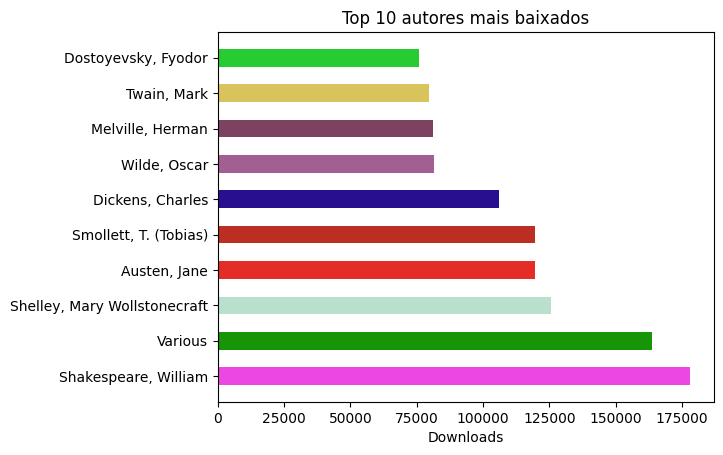

In [119]:
#para execução de testes na manipulação do dataframe
#achei viável utilizar o arquivo salvo que obtive das requisições
#df = pd.read_pickle('books.pkl')

#como dito na documentação da API, todo livro possui um array de objetos da classe Person
#como queremos identificar os autores pelo seus nomes
#achei viavel criar uma função que apenas retorne um array que contenha os nomes sem as informações extras que haviam
def Name(x):
  listOfAuthors = []
  for data in x:
    listOfAuthors.append(data['name'])
  return listOfAuthors

#colunas que serão utilizadas
df = df[["title","authors","download_count"]]

#altera a coluna com array sobre dados dos autores para somente um array com seus nomes
df.authors = df.authors.apply(lambda x: Name(x))

#alguns livros possuem mais de um autor
#logo seria interressante isolar uma mesma obra para cada nome de autor qu está no array
df = df.explode('authors')

#a partir do nome do autor contabilizamos o número total de downloads de todas as obras que escreveu
authors_count = df.groupby(['authors']).agg({'download_count':sum})

#obtemos os 10 maiores valores
top10Authors = authors_count.nlargest(10,'download_count')

#plotagem do gráfico
horizontalBarChart(top10Authors.download_count,top10Authors.index,'Top 10 autores mais baixados','Downloads')


###Análise 2

Sabemos os autores que possuem mais downloads em suas obras, mas quais autores possuem mais obras?

É importante notar que como os dois primeiros autores são generalizações e não possuem nomes de autores associados. Logo, optei que os 10 primeiros fossem da 2 até a 12 posição.

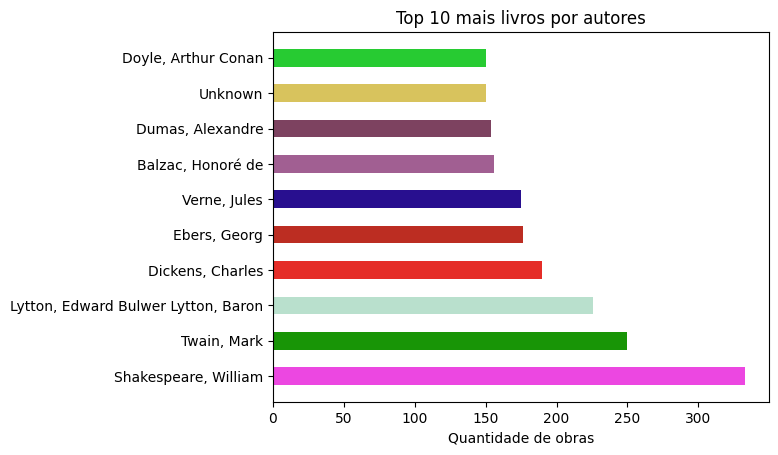

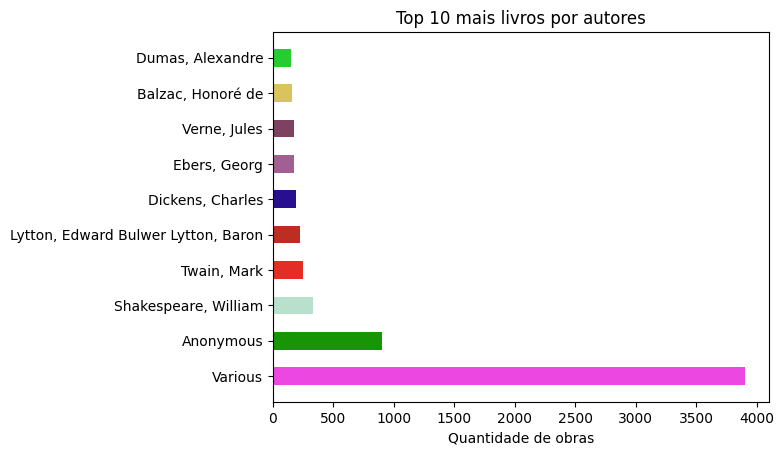

In [120]:
#a partir do dataframe anteriormente modificado investigamos quais autores possuem mais obras
#ecolhi os 10 primeiros
mostBooksAuthor = df['authors'].value_counts().iloc[2:12]
horizontalBarChart(mostBooksAuthor,mostBooksAuthor.index,'Top 10 mais livros por autores','Quantidade de obras')

#note que os dois primeiros não correspondem a um autor em específico
mostBooksAuthor = df['authors'].value_counts().iloc[0:10]
horizontalBarChart(mostBooksAuthor,mostBooksAuthor.index,'Top 10 mais livros por autores','Quantidade de obras')

###Análise 3

Sabemos quais autores possuem mais downloads, mas qual será a obra de maior número de downloads desses autores? Por exemplo Shakespeare possui inúmeras obras e grande volume de downloads, mas alguma obra é mais significativa?

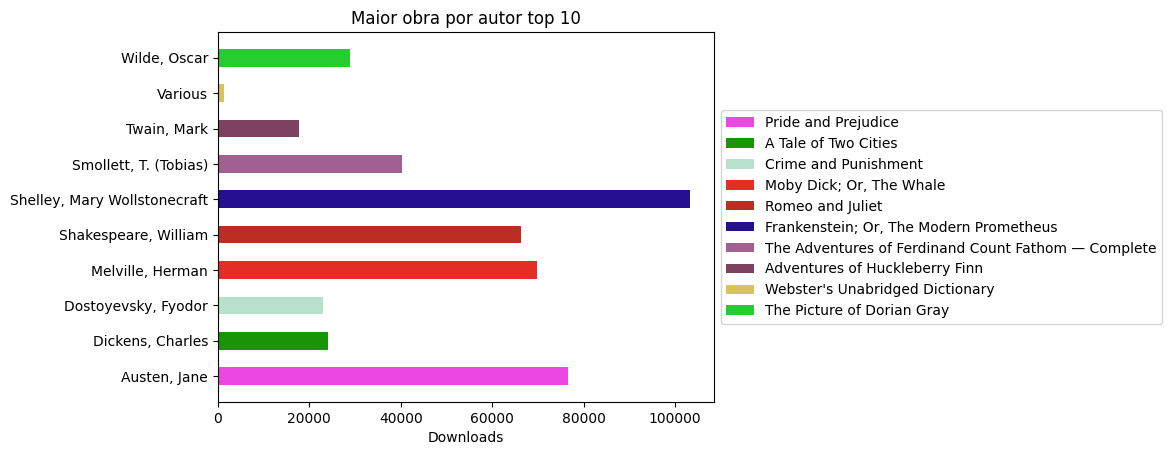

In [121]:
#colunas que serão utilizadas
biggestTitleAuthor=df[['title','authors','download_count']]

#gera um dataframe que contenha apenas as obras dos autores mais baixados
biggestTitleAuthor = biggestTitleAuthor[biggestTitleAuthor.authors.isin(top10Authors.index)]
#para cada autor obtemos a obra com maior número de downloads
biggestTitleAuthor = biggestTitleAuthor.loc[biggestTitleAuthor.groupby('authors')['download_count'].idxmax()]

#plota gráfico
horizontalBarChart(biggestTitleAuthor.download_count,biggestTitleAuthor.authors,'Maior obra por autor top 10','Downloads',biggestTitleAuthor.title)

###Conclusão

Quais conclusões podemos obter a partir dos dados observados?

1. Frankstein é a obra mais expressiva da autora Shelley. Sendo a responsável pelo elevado número de downloas associados as obras da autora.

2. Shakespeare além de um alto número de downloads, também possui inúmeras obras. No entanto, Romeu e Julieta é o maior responsável pelo número de downloas associados ao autor.

3. Obras associadas a vários autores sem nenhum nome de autor presente possuem uma alta quantidade de downloads, mas não há nenhum livro expressivo dentre eles. Logo, nota-se que deve haver uma quantidade massiva de livros que se encaixam nesta categoria fazendo com que a quantidade de downloads seja alta.

4. Orgulho e Preconceito é responsável pelo alto número de downloads associados a Jane Austen.